# PIMA INDIAN DIABETES EDA
In this notebook, I will find out patterns, trends and different relation ship among different features in the dataset with target variable by visualizing the dataset.

# About Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

# Importing Libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import itertools
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


This dataset is known to have missing values.Specifically, there are missing observations for some columns that are marked as a zero value.We will deal them in Modeling part. In this part we will focus only on data visualization part.

Number of patients diagnosed with Diabtetes disease:  500
Number of patients not diagnosed with Diabtetes disease:  268


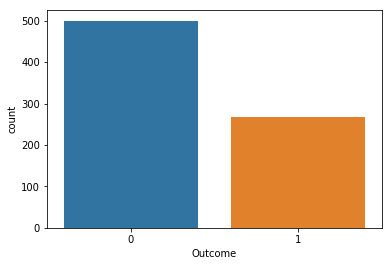

In [6]:
sns.countplot(data=df, x = 'Outcome', label='Count')

DB, NDB = df['Outcome'].value_counts()
print('Number of patients diagnosed with Diabtetes disease: ',DB)
print('Number of patients not diagnosed with Diabtetes disease: ',NDB)

# Brief Analysis of the Data

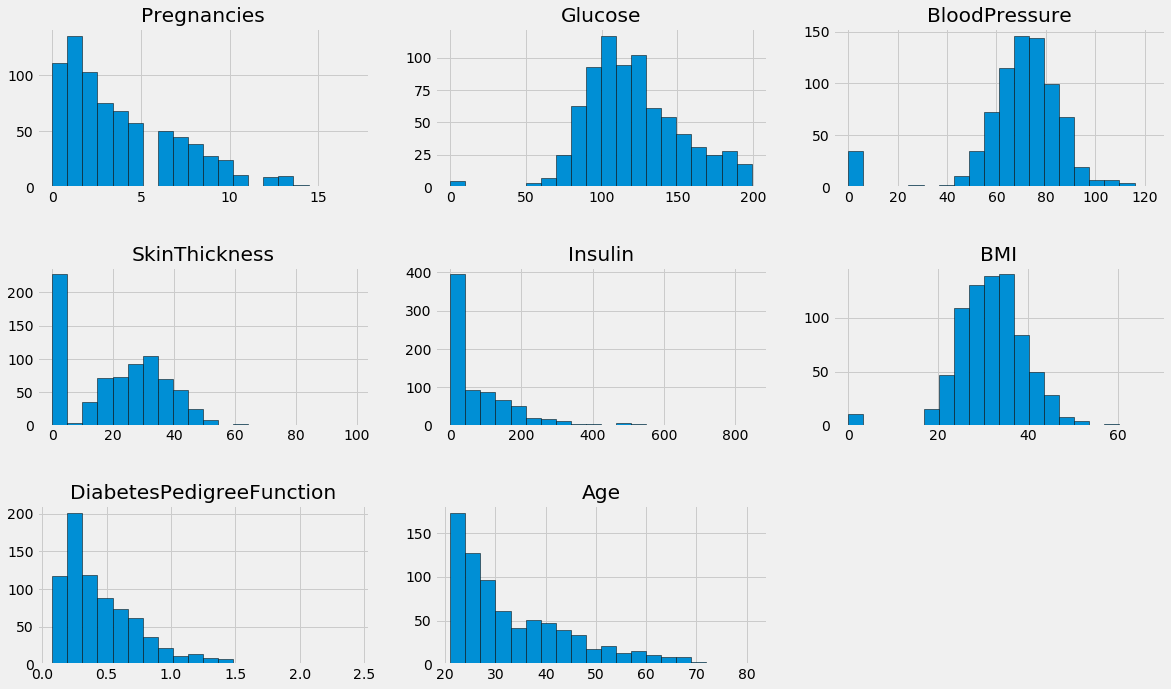

In [10]:
columns=df.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

It seems to have even distribution of data in all the features of the dataset.

# Analysis of Diabetic Cases

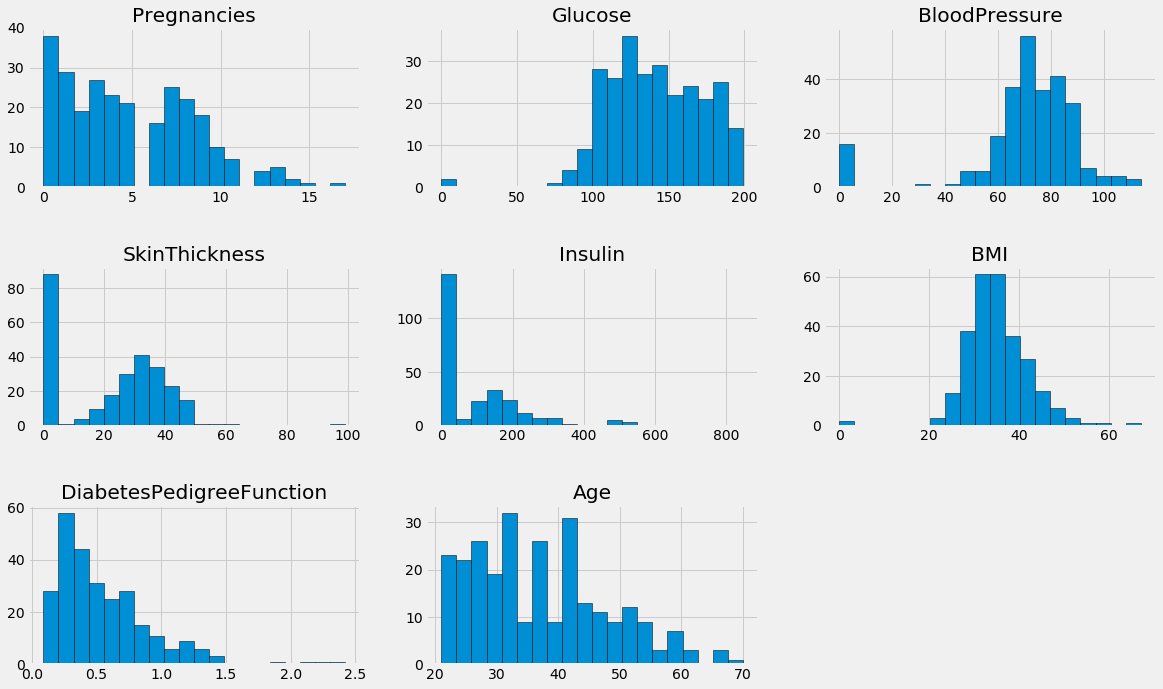

In [11]:
df1=df[df['Outcome']==1]
columns=df.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

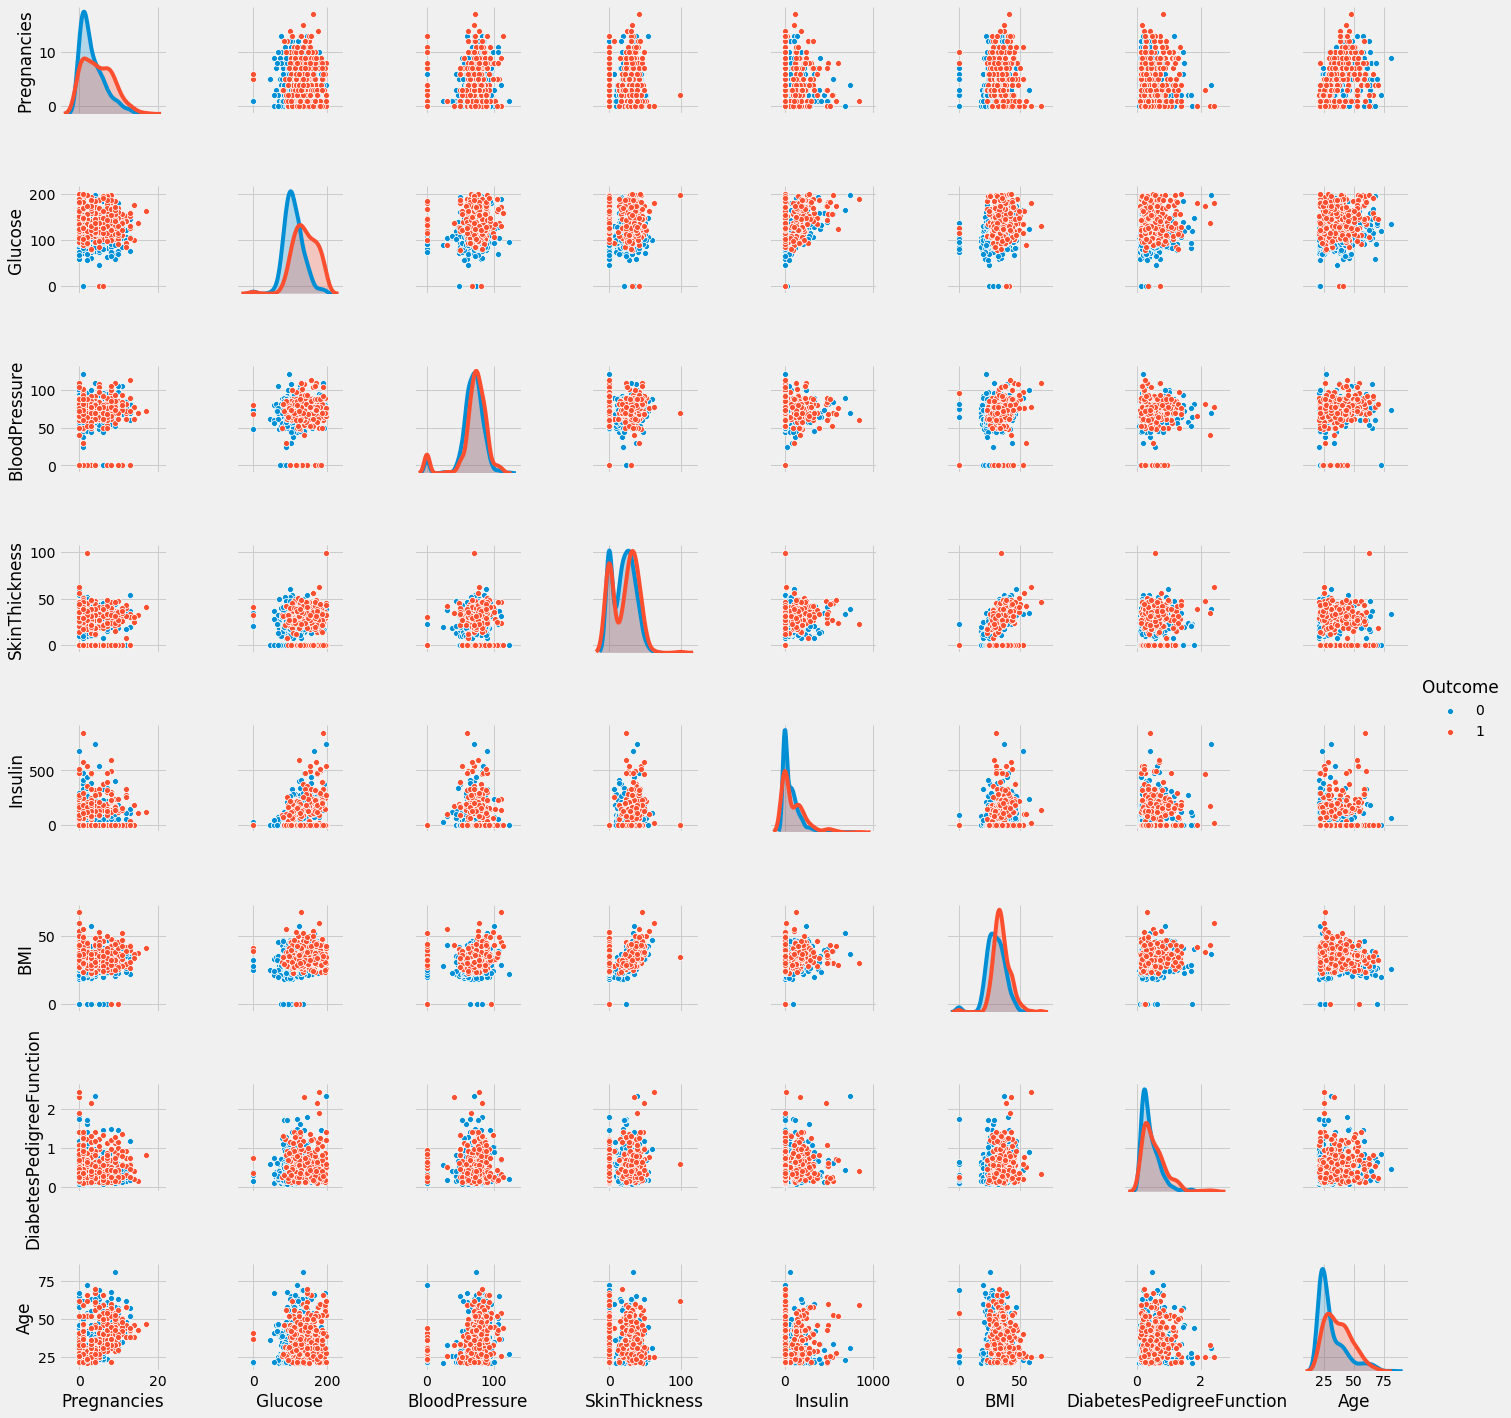

In [12]:
sns.pairplot(df, hue = 'Outcome', vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age'] )

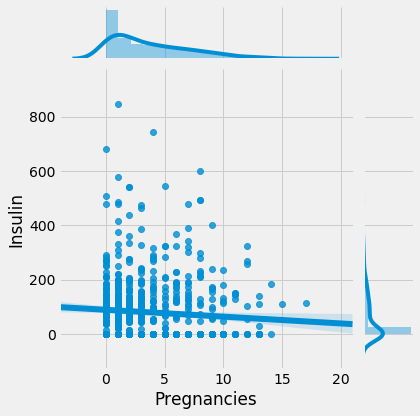

In [13]:
sns.jointplot("Pregnancies", "Insulin", data=df, kind="reg")

# Feature Engineering
Now, its time to add important features to the dataset and see their effect by visualizing them.

**Feature 1 : BMI Indicator**<br>
I m adding BMI Indicator feature as we know :
If you have a BMI of:
- Under 18.5 – you are considered underweight and possibly malnourished.
- 18.5 to 24.9 – you are within a healthy weight range for young and middle-aged adults.
- 25.0 to 29.9 – you are considered overweight.
- Over 30 – you are considered obese.

In [14]:
def set_bmi(row):
    if row["BMI"] < 18.5:
        return "Under"
    elif row["BMI"] >= 18.5 and row["BMI"] <= 24.9:
        return "Healthy"
    elif row["BMI"] >= 25 and row["BMI"] <= 29.9:
        return "Over"
    elif row["BMI"] >= 30:
        return "Obese"

In [15]:
df = df.assign(BM_DESC=df.apply(set_bmi, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BM_DESC
0,6,148,72,35,0,33.6,0.627,50,1,Obese
1,1,85,66,29,0,26.6,0.351,31,0,Over
2,8,183,64,0,0,23.3,0.672,32,1,Healthy
3,1,89,66,23,94,28.1,0.167,21,0,Over
4,0,137,40,35,168,43.1,2.288,33,1,Obese


**Feature 2: Insulin Indicative Range** <br>
If insulin level (2-Hour serum insulin (mu U/ml)) is >= 16 and <= 166, then it is normal range
else it is considered as Abnormal

In [16]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [17]:
df = df.assign(INSULIN_DESC=df.apply(set_insulin, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BM_DESC,INSULIN_DESC
0,6,148,72,35,0,33.6,0.627,50,1,Obese,Abnormal
1,1,85,66,29,0,26.6,0.351,31,0,Over,Abnormal
2,8,183,64,0,0,23.3,0.672,32,1,Healthy,Abnormal
3,1,89,66,23,94,28.1,0.167,21,0,Over,Normal
4,0,137,40,35,168,43.1,2.288,33,1,Obese,Abnormal


Number of patients Having Abnormal Insulin Levels:  508
Number of patients Having Normal Insulin Levels:  260


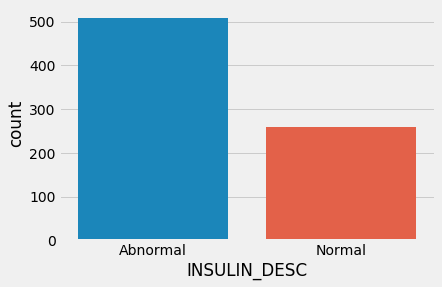

In [18]:
sns.countplot(data=df, x = 'INSULIN_DESC', label='Count')

AB, NB = df['INSULIN_DESC'].value_counts()
print('Number of patients Having Abnormal Insulin Levels: ',AB)
print('Number of patients Having Normal Insulin Levels: ',NB)

It seems from the above plot that more than 500 patients have Abnormal Insulin Levels where as around 250 patients have Normal Insulin Levels.

Number of patients Having Underweight BMI Index:  472
Number of patients Having Healthy BMI Index:  179
Number of patients Having Overweigth BMI Index:  102
Number of patients Having Obese BMI Index:  15


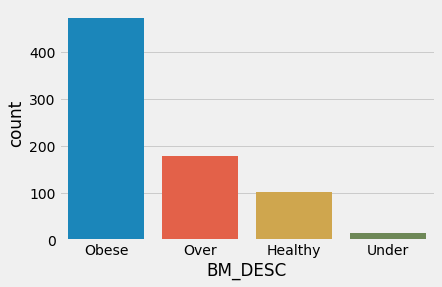

In [19]:
sns.countplot(data=df, x = 'BM_DESC', label='Count')

UD,H,OV,OB = df['BM_DESC'].value_counts()
print('Number of patients Having Underweight BMI Index: ',UD)
print('Number of patients Having Healthy BMI Index: ',H)
print('Number of patients Having Overweigth BMI Index: ',OV)
print('Number of patients Having Obese BMI Index: ',OB)

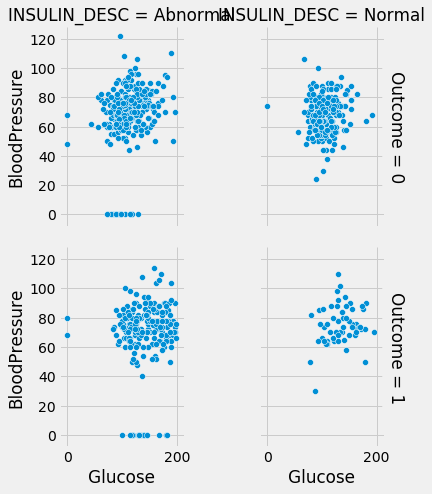

In [23]:
g = sns.FacetGrid(df, col="INSULIN_DESC", row="Outcome", margin_titles=True)
g.map(plt.scatter,"Glucose", "BloodPressure",  edgecolor="w")
plt.subplots_adjust(top=1.1)

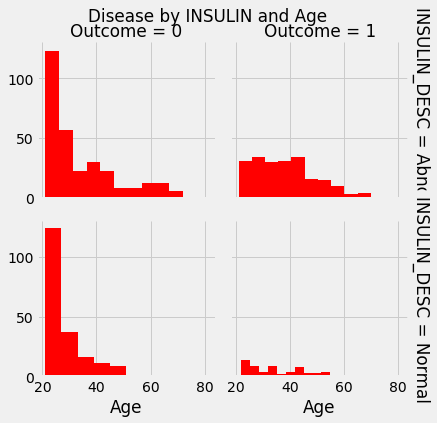

In [25]:
g = sns.FacetGrid(df, col="Outcome", row="INSULIN_DESC", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by INSULIN and Age');

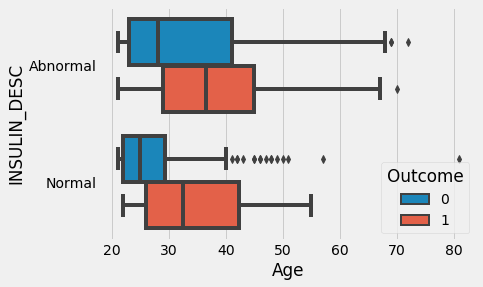

In [31]:
sns.boxplot(x="Age", y="INSULIN_DESC", hue="Outcome", data=df);

It seems from the above plot that patients having normal insulin levels are more diabetic within the age range from 25 and 42
where as patients having anormal insulin levels are more diabetic in the age range of late 20's to mid 40's.

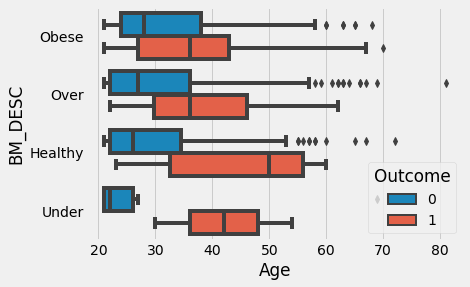

In [30]:
sns.boxplot(x="Age", y="BM_DESC", hue="Outcome", data=df);

From the above plot it is evident that patients who are obese as per BMI index are more diabetic in early age of 25 where as patients who are overweight are prone to diabetes in early 30's

As far as data is concerned it is the data of all women patients at least 21 years old of Pima Indian heritage.So, the findings may differ in other cases.